(clustering:top)=

# Introduction

Clustering offers a "birds-eye view" of the data in the collections. Instead of finding individual objects through searching & filtering, you instead see the aggregated counts for each field (material, technique, style, etc) of the object records matching on your query (which can also have most of the same parameters available to search & filter, where applicable). This is useful for exploring the data, giving a sense of the scale of different aspects of the collection, and is particularly useful for data visualisation.

Clustering can return results in full across all the authority controlled fields, or, if you already have in mind a specific field you are interested in (for example, wanting to find out which materials were most in use in Venice in the 18th century, according to our object records), you can specify that particular field to return only those counts. 

The available fields for clustering are:
    
    * Material - Which materials are used in making an object.
    * Technique - Which technique are used in an object's production.
    * Place - Where was an object made (or where does it depict, or is associated with).
    * Person - Who made the object, or is depicted on it, or is associated with an object.
    * Maker - Who made the object
    * Depicts - Who or what is depicted on an object
    * Depicts (Person) - Who is depicted on an object
    * Associated (Person) - Who is associated with an object
    * Category - What category is an object asigned to.
    * Collection - Which collection in the museum does an object belong to.
    * Event - What event is depicted or associated with an object.
    * Gallery - Which gallery is the object on display in.
    * Object Type - What type of object is this.
    * Organisation - Which organisation is created, is depicted, or is associated with an object.
    * Style - What artistic style is the object considered to have.
    * Accession Year - What year was the object accessioned to the museum collection.
 
There are two ways to request individual facets, one also returns the meta information about your query, the other just returns the terms. The examples below show both in use.

```{note}
It should be noted the writer of this API documentation is a particular enthusiast for treemap data visualisations (ideally interactive - currently only appearing as fixed images below), but is willing to be convinced there are other ways to visualise cluster data, which *may* be even be better. [Pull Requests](https://github.com/vanda/etc-docs/) either to improve treemaps or replace them welcome. 
```

## Cluster Specific API Parameters

As mentioned you can use all the normal parameters for a search or filter query to reduce your results down to a subset you are interested in. There is an alternative parameter for clustering available as well:

  - cluster_size - Use this instead of page_size to specify the number of results (upto a max of 100). If not set, the default size of 20 is used.

```{note}
The following code is used to create the treemap visualisation using the Vega data visualisation library. Reveal if you want to see the details, send a pull request if you know a better way of doing this, and especially if you can think of something to encode to show a colour range, and also make sure the text fits within the box.
```

In [47]:
from IPython.display import display

def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

def treemap(clusters, cluster_name, colour = "blue"):
    
  clusters_json = [{"id": index+1, "name": [x["value"], "%d objects" % x["count"]], "parent": '0', "value": x["count"]} for index, x in enumerate(clusters)]
  clusters_json.insert(0, {"id": 0, "value": 0, "name": cluster_name})
    
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 1200,
  "height": 800,
  "padding": 2.5,
  "autosize": "none",
  "data": [
    {
      "name": "tree",
      "values": clusters_json,
      "transform": [
        {
          "type": "stratify",
          "key": "id",
          "parentKey": "parent"
        },
        {
          "type": "treemap",
          "field": "value",
          "sort": {"field": "value", "order": "descending"},
          "round": True,
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.children" }]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.parent == 0" }]
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "value"},
      "range": [ colour ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 10, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1.0]
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "value"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {
          "stroke": {"value": "#fff"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"},
          "href": {"value": "https://collections.vam.ac.uk/"}
        },
        "hover": {
          "fill": {"value": "green"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "leaves"},
      "interactive": False,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
)

## Field Clustering

### Materials

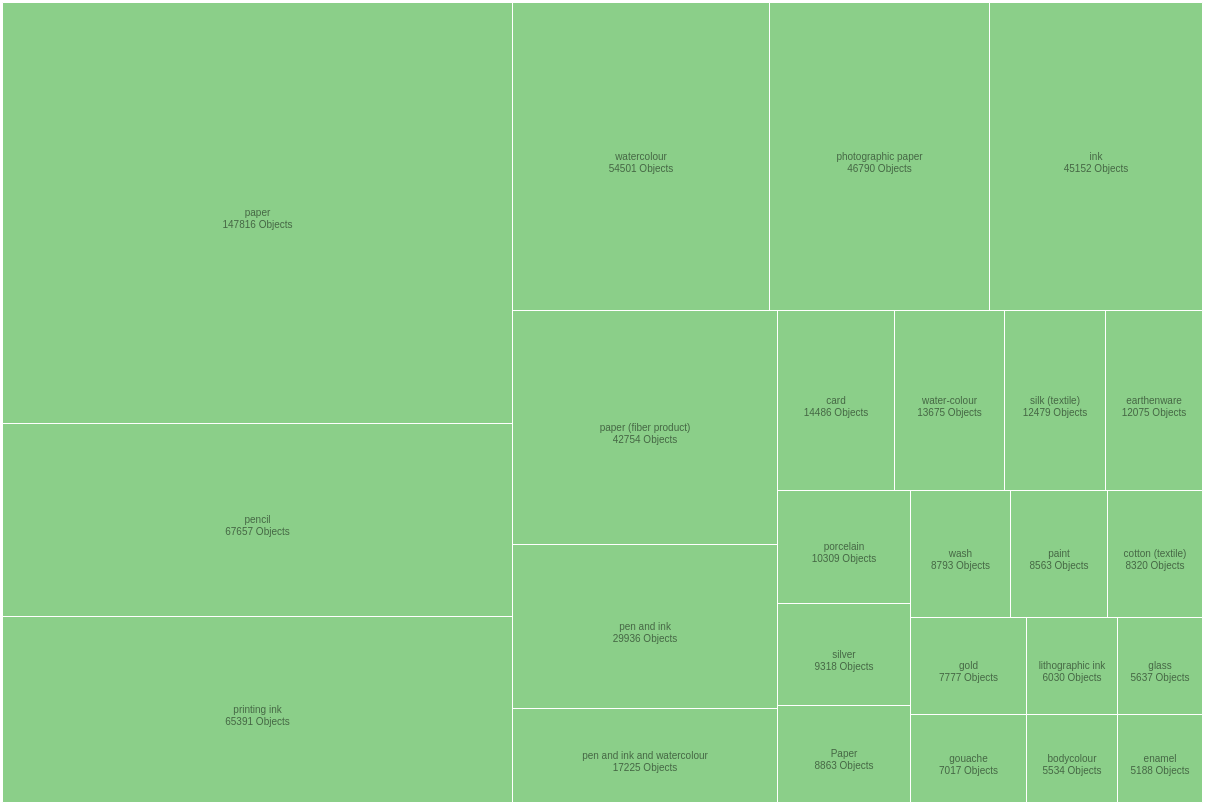

In [46]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/material/search?cluster_size=25')
# Of course, in a real use case, error handling in case of no results should be added here instead of passing results directly to the treemap function
treemap(req.json(), "Materials", "#8bcf89")

### Techniques

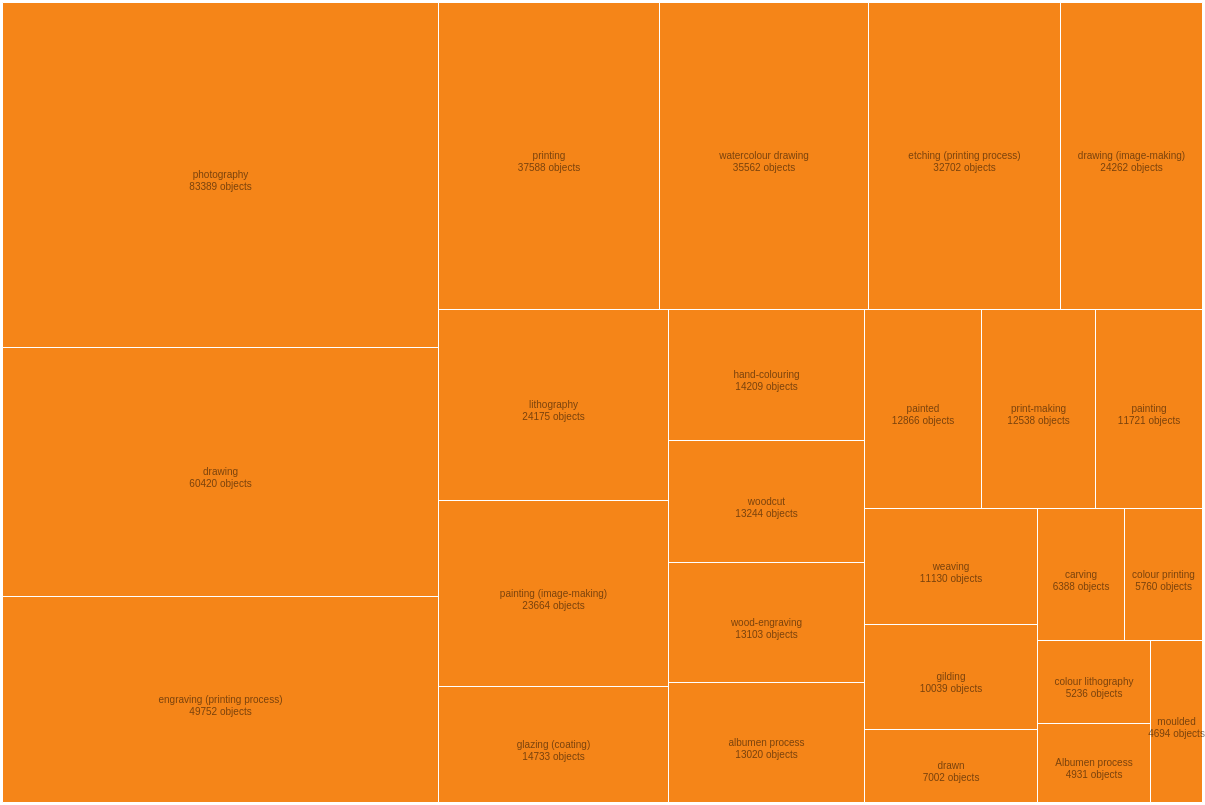

In [48]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/technique/search?cluster_size=25')
treemap(req.json(), "Top 25 Techniques", "#f58518")

### Person

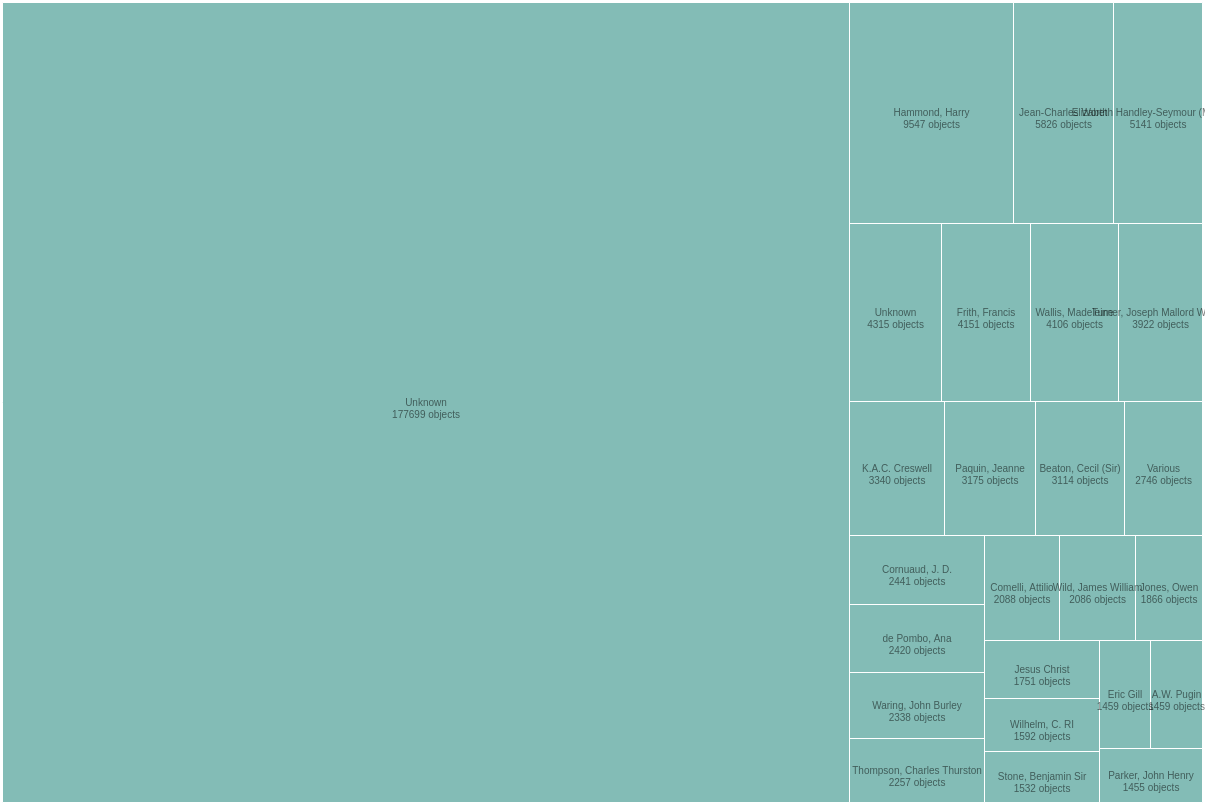

In [49]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/person/search?cluster_size=25')
treemap(req.json(), "Top 25 Person", "#83bcb6")

In [ ]:
```{note}
Removing the very large 'Unknown' group is left as an exercise for the reader
```

### Maker

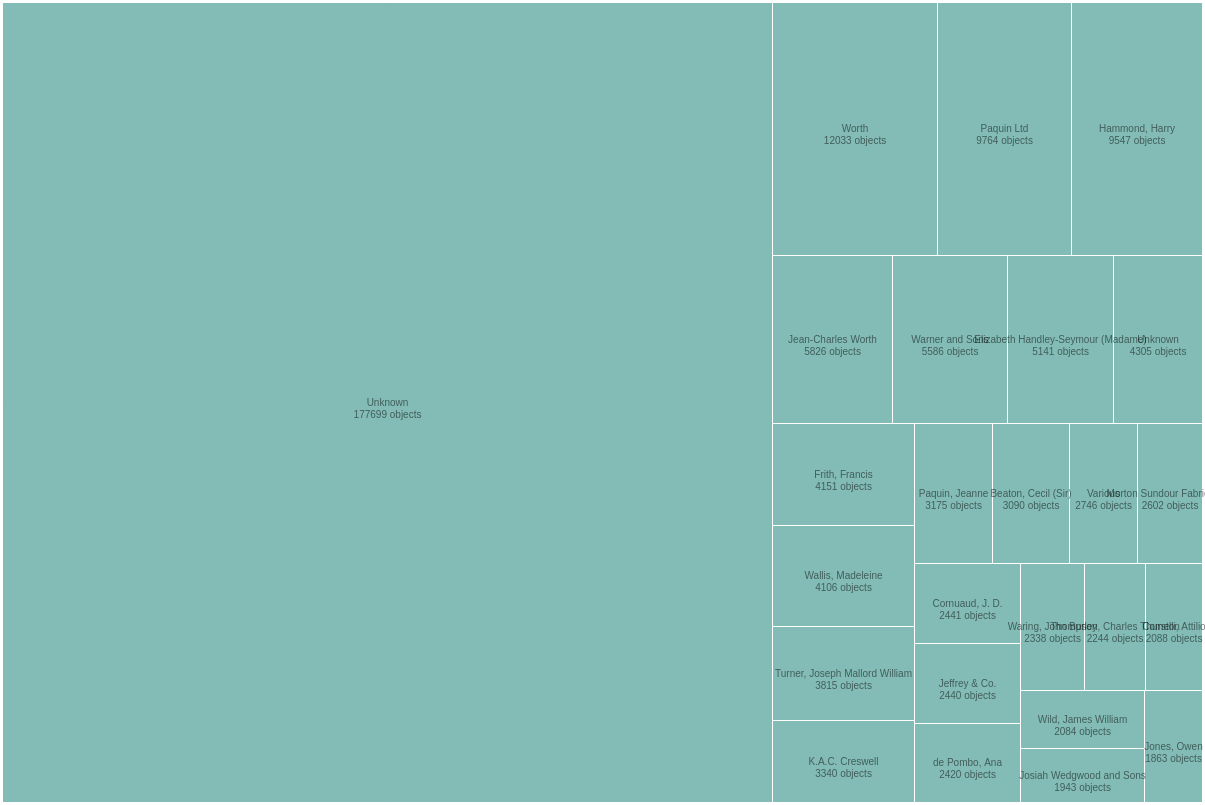

In [50]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/maker/search?cluster_size=25')
treemap(req.json(), "Top 25 Makers", "#83bcb6")

### Depicts

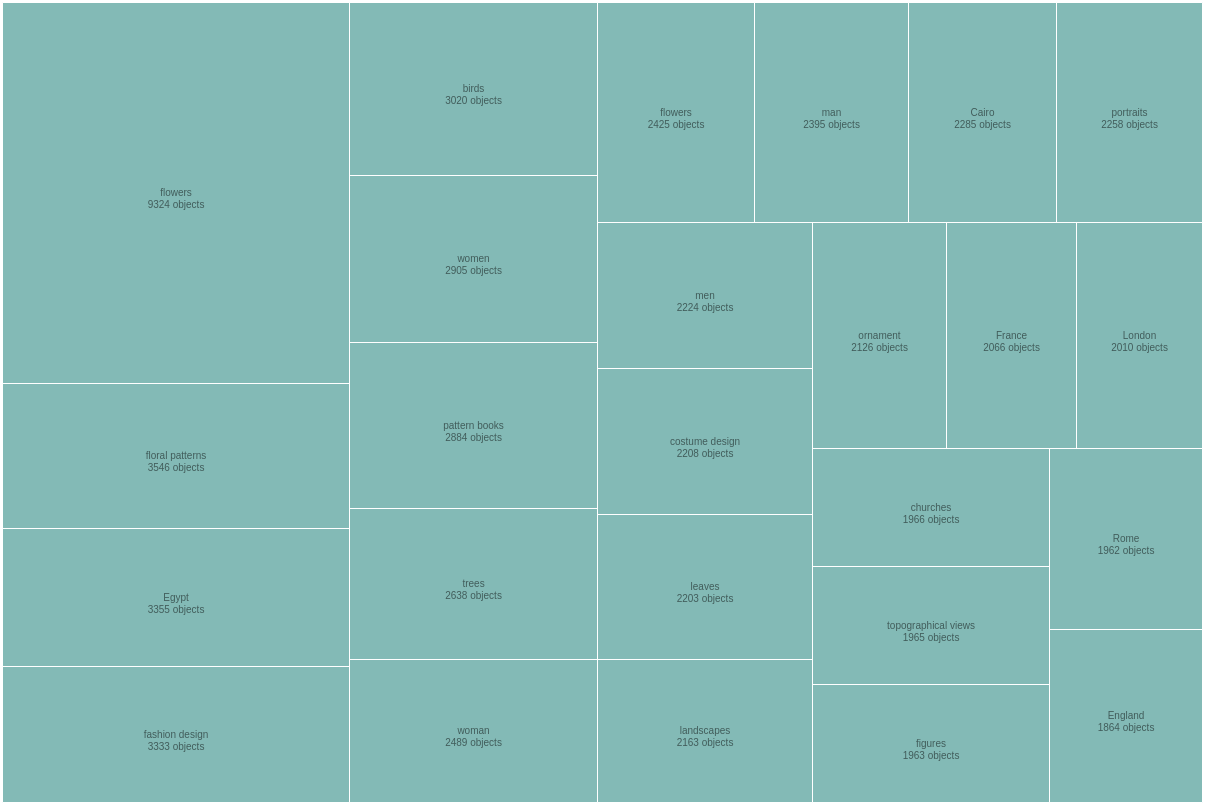

In [51]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/depicts/search?cluster_size=25')
treemap(req.json(), "Top 25 Depictions", "#83bab6")

### Depicts (Person)

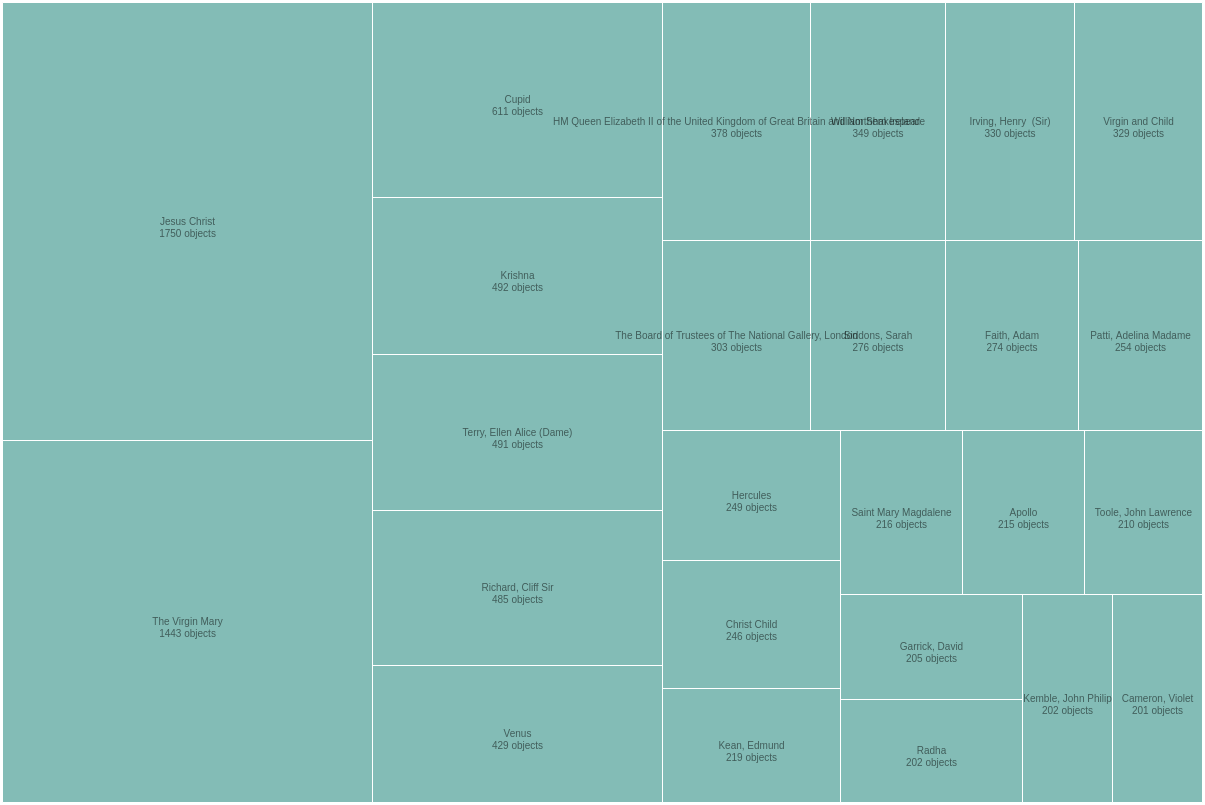

In [52]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/depicts_actor/search?cluster_size=25')
treemap(req.json(), "Top 25 Actors (Person, People or Organisation)", "#83bcb6")

### Associated Actor (Person, People or Organisation)

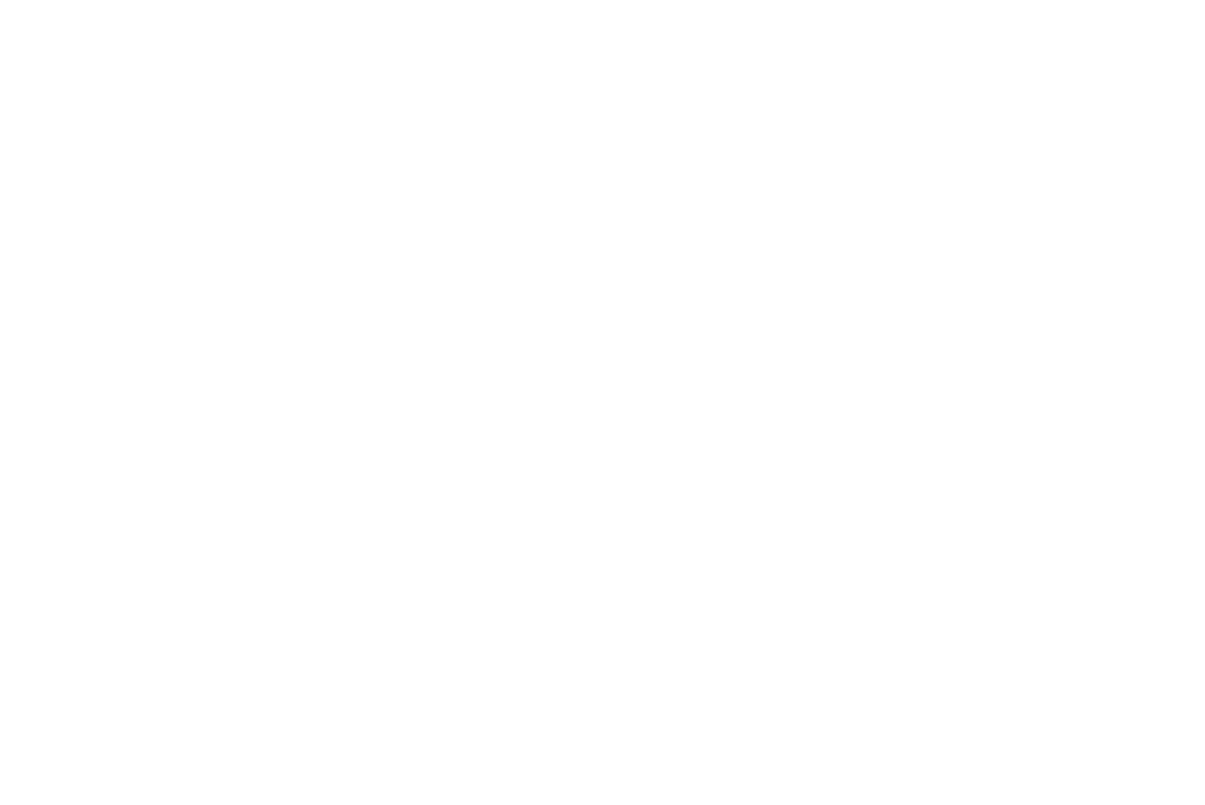

In [28]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/associated_actor/search?cluster_size=25')
treemap(req.json(), "Top 25 Associated Actors (Person, People, Organisation)", "#83bcb6")

### Category

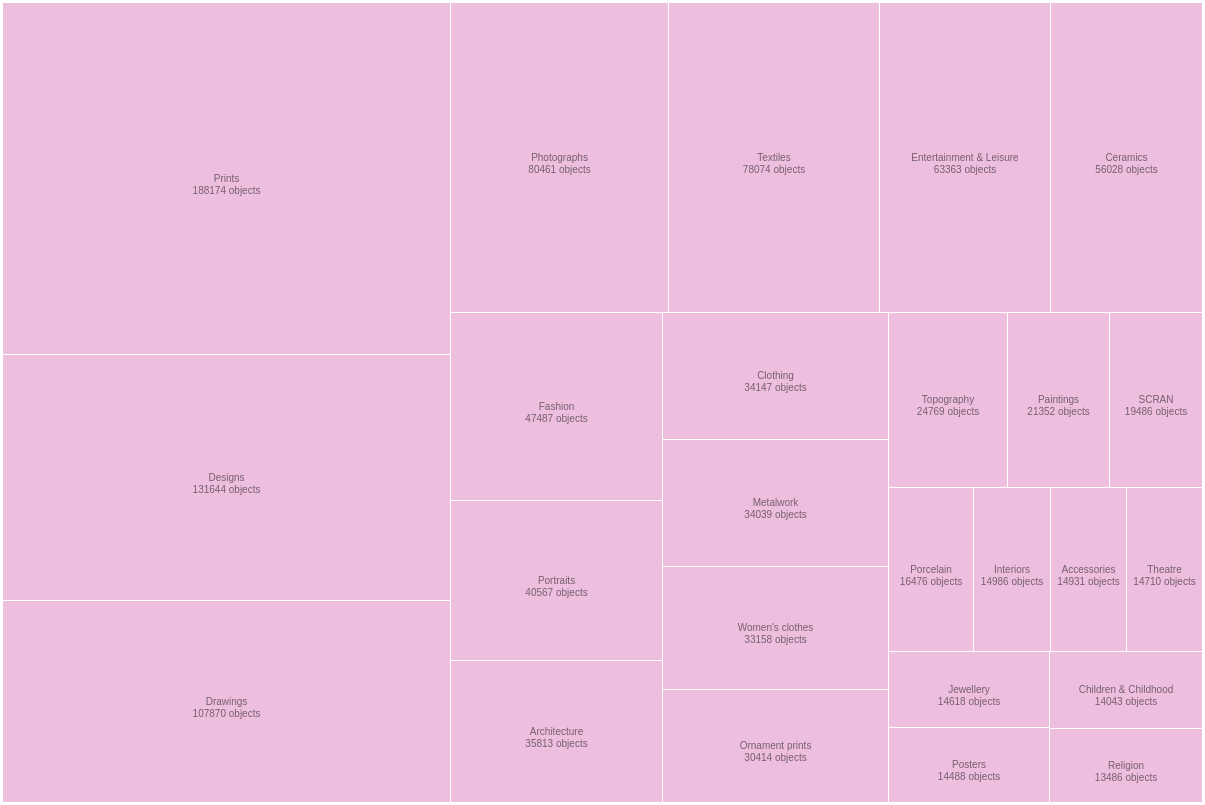

In [57]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/category/search?cluster_size=25')
treemap(req.json(), "Top 25 Categories", "#eebede")

### Style

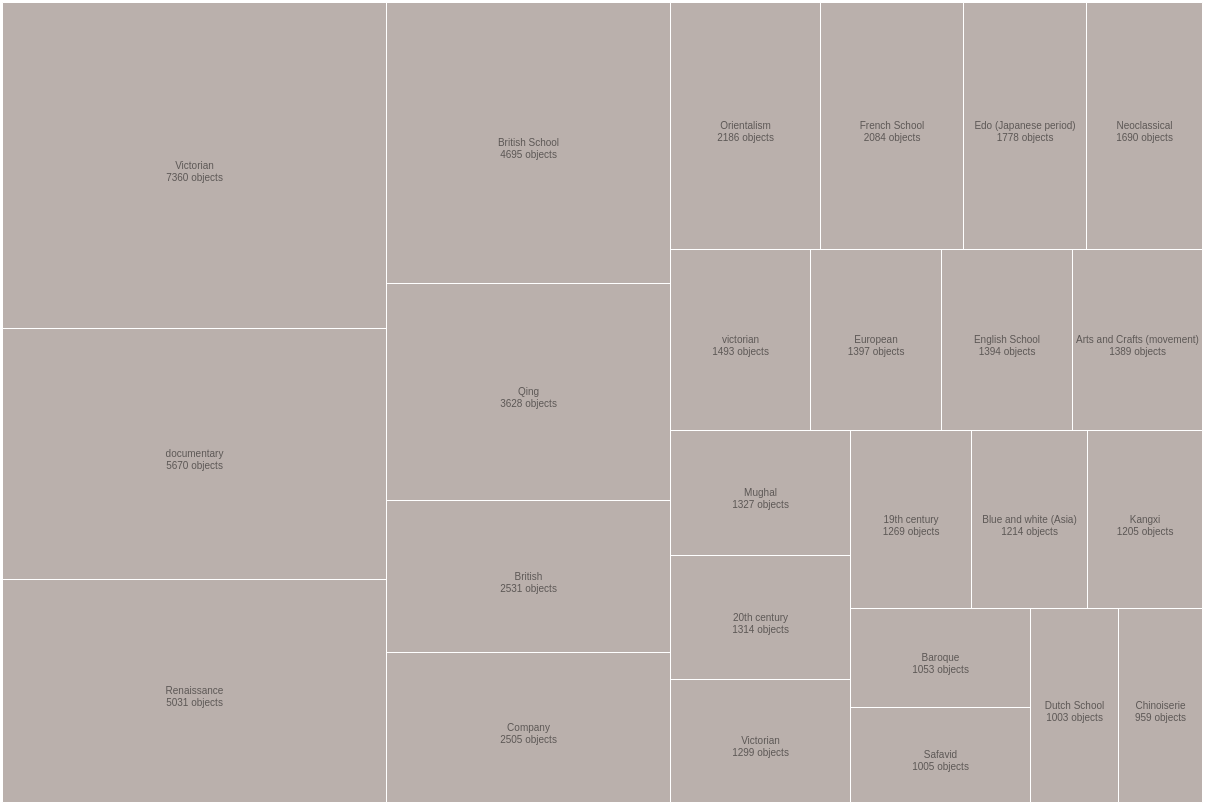

In [58]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/style/search?cluster_size=25')
treemap(req.json(), "Top 25 Styles", "#bab0ac")

### Accessioned

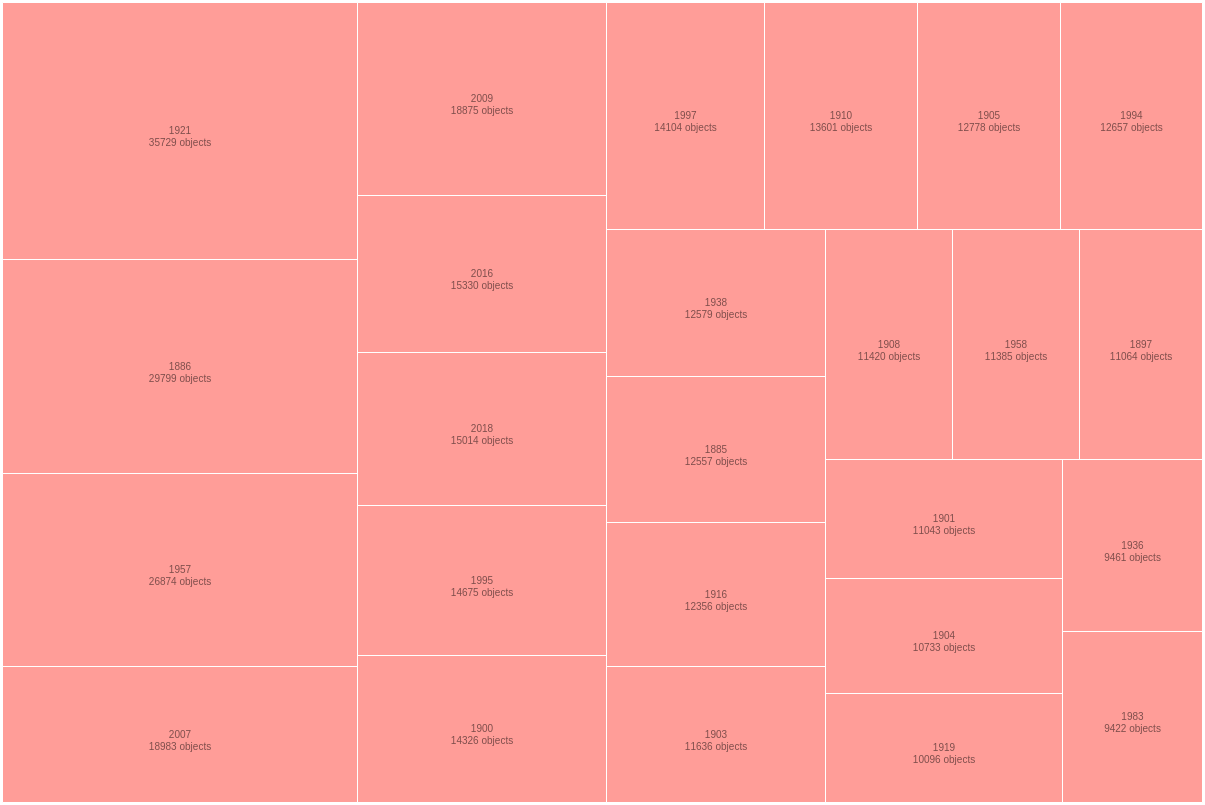

In [59]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/accession_year/search?cluster_size=25')
treemap(req.json(), "Top 25 Accession Years", "#ff9d98")

### Place

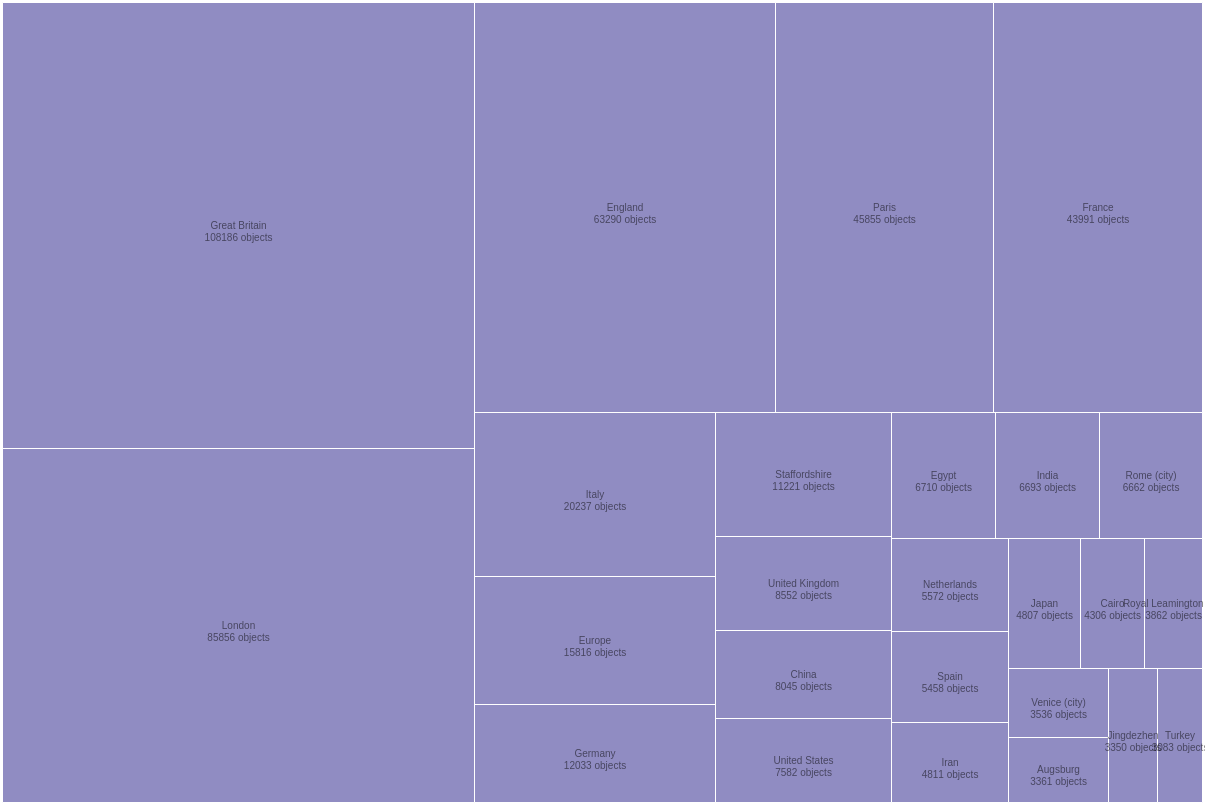

In [60]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/place/search?cluster_size=25')
treemap(req.json(), "Top 25 Places", "#908cc2")

### Object Type

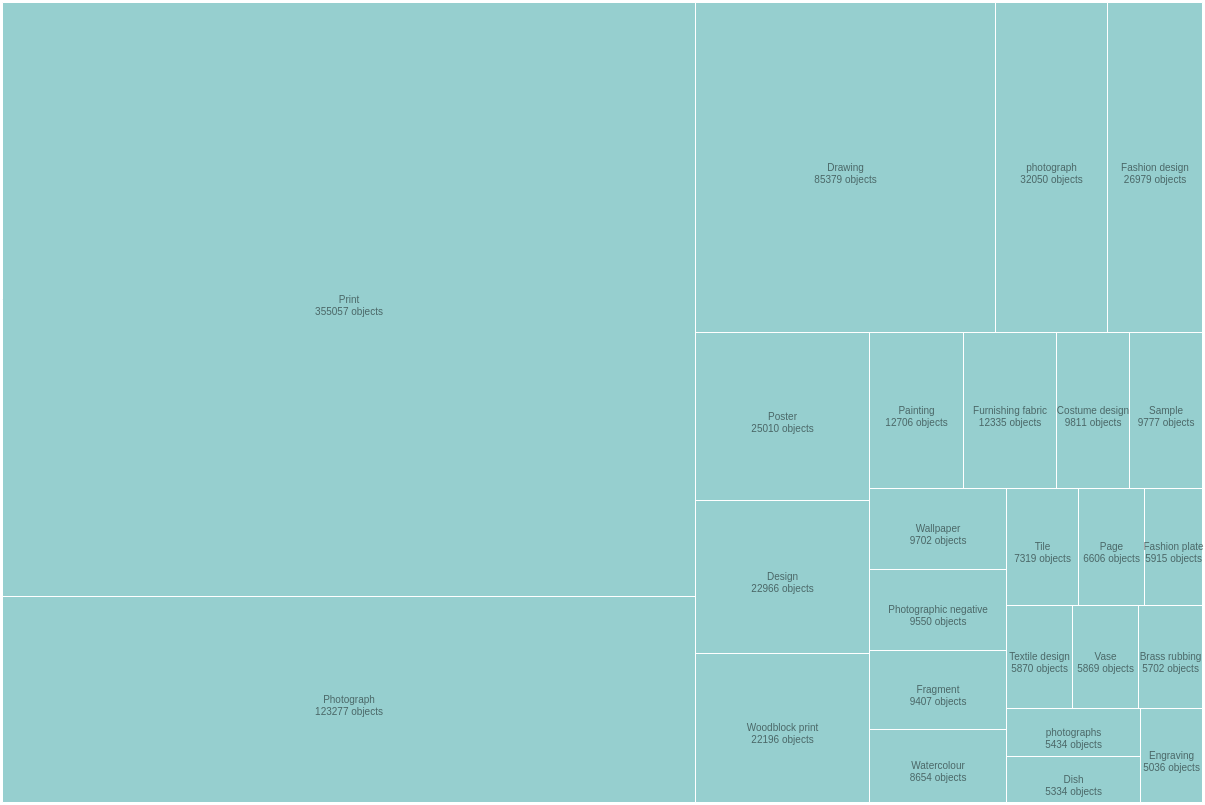

In [61]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/object_type/search?cluster_size=25')
treemap(req.json(), "Top 25 Object Types", "#96cfcf")

### Collection

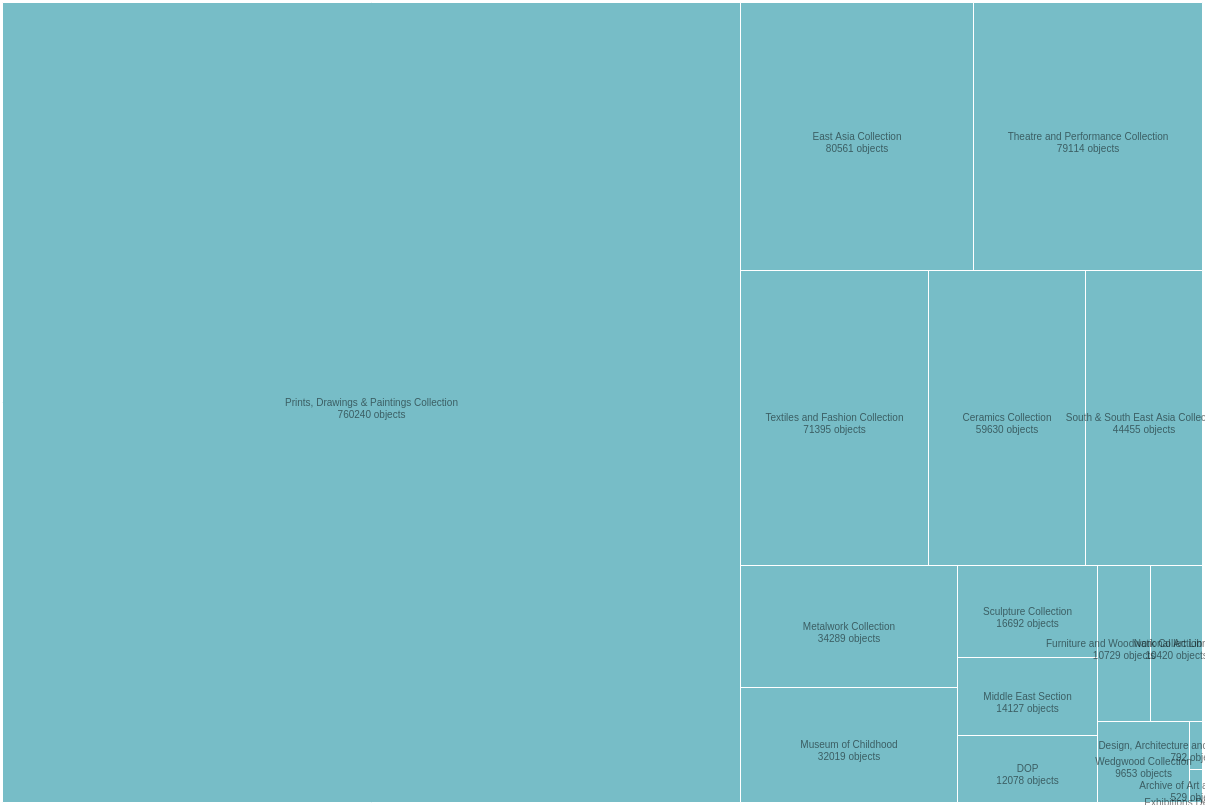

In [63]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/collection/search')
treemap(req.json(), "Collections", "#77bdc7")

### Event

Not a commonly used category, hence the low numbers.

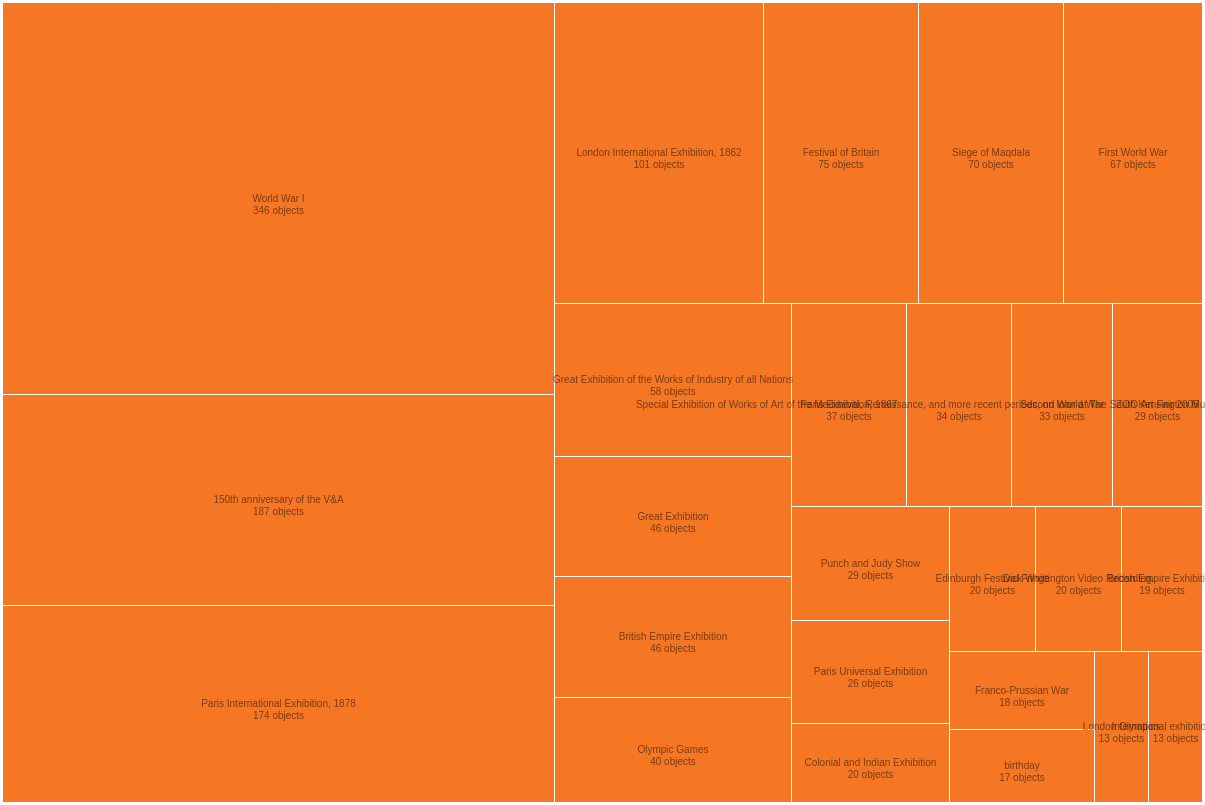

In [64]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/event/search?cluster_size=25')
treemap(req.json(), "Top 25 Events", "#f57724")

### Organisation

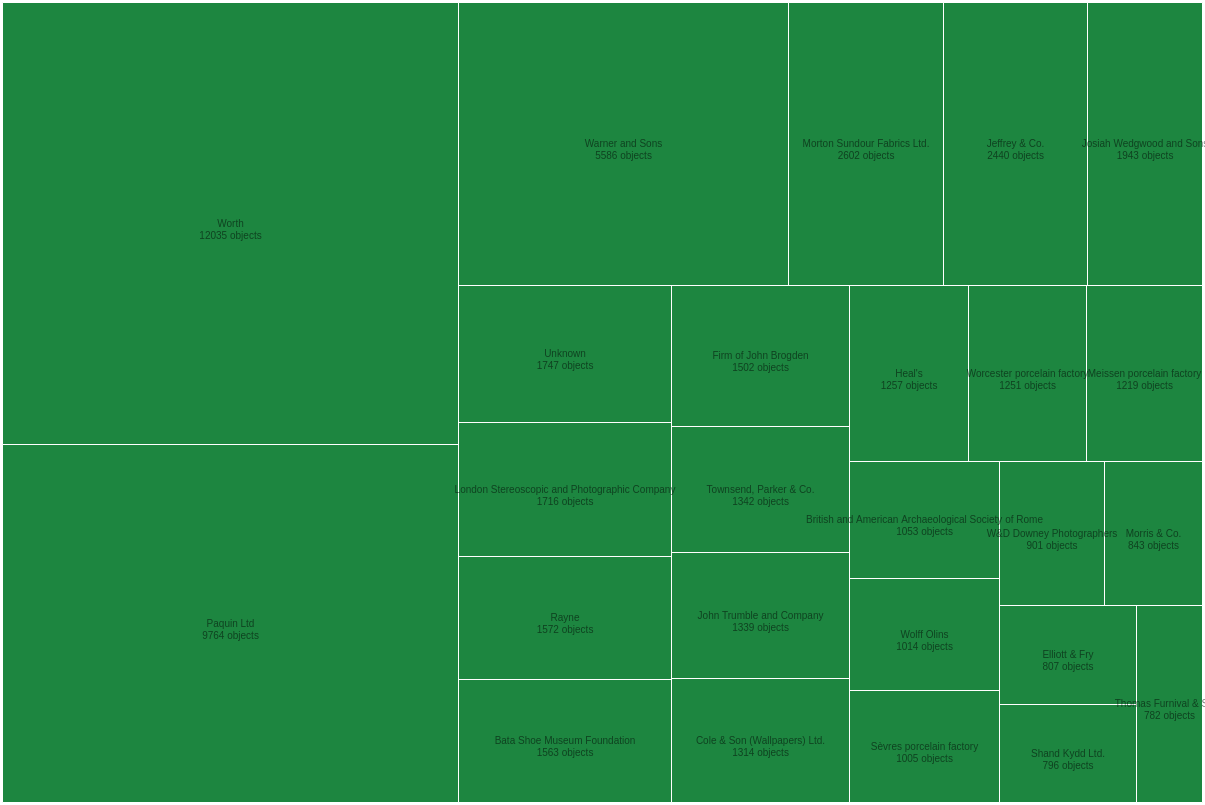

In [65]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/organisation/search?cluster_size=25')
treemap(req.json(), "Top 25 Organisations", "#1d8640")

## Cluster Exploration Examples

### Materials used in Venice in the 18th century 

To return to the example at the start, let's see which materials are in use in objects from (or depicting or association with) Venice between 1700 and 1800

```{note}
At present the id_place parameter *cannot* be restricted to return objects "made in this place" only (excluding depictions of the place, or associated with the place). This is a feature we will consider adding in future versions of the API.
```

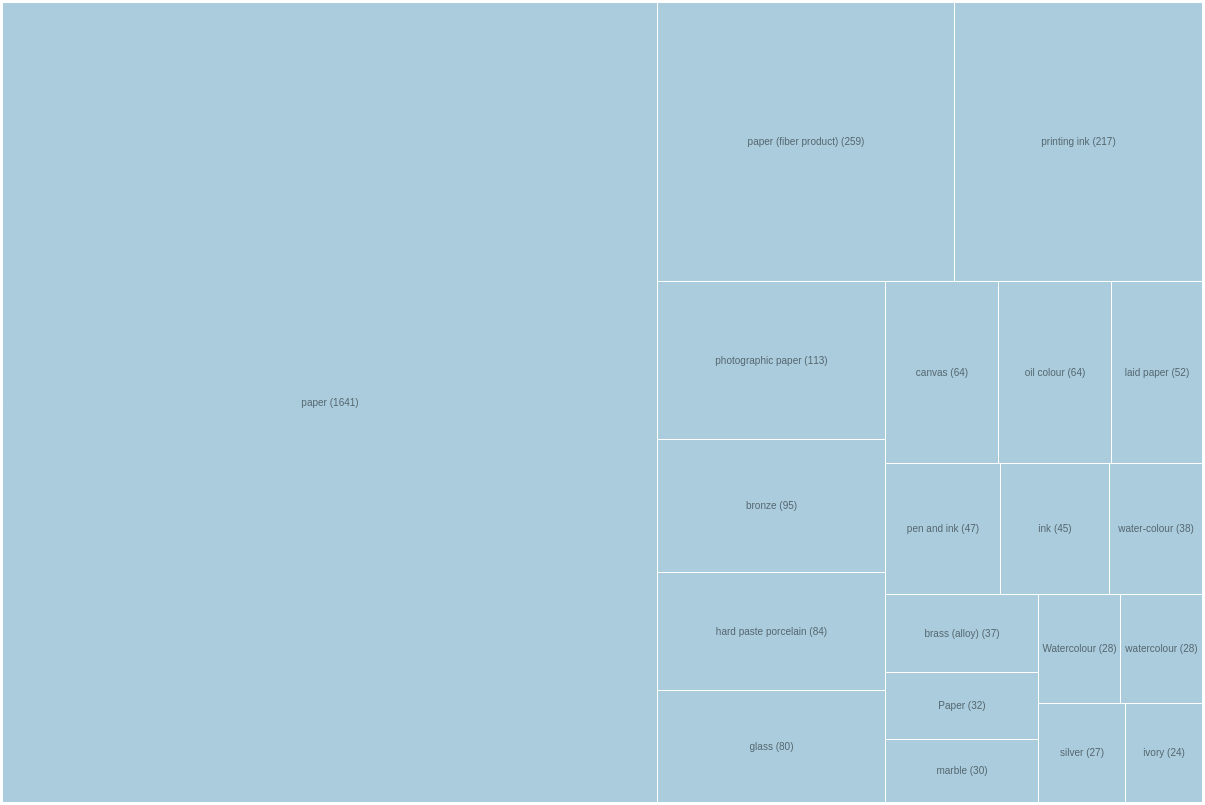

In [33]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/material/search?id_place=x29237&made_after_year=1700&made_before_year=1800')
treemap(req.json(), "Materials", "#aaccdd")

### Objects containing plastic accessioned in the C20th

In [80]:
import requests
import altair as alt
import pandas as pd
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/accession_year/search?id_material=AAT14570&year_made_from=1900&year_made_to=1999&cluster_size=100')
object_clusters = req.json()
materials = object_clusters["terms"]
materials_df = pd.DataFrame(materials)

bars = alt.Chart(materials_df).mark_bar().encode(
    x='count:Q',
    y="value:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='count:Q'
)

(bars + text).properties(height=900, title="Objects containing plastic accessioned to the V&A in the C20th")

alt.LayerChart(...)

In [ ]:
See more worked examples in the [[Data Exploration|https://developers.vam.ac.uk/notebooks/data-exploration/]] site.

In [2]:
pip install vega_datasets

     |████████████████████████████████| 210 kB 5.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# DO NOT REMOVE This code is just here to force Jupyterbook to generate the diagrams as PNGs above. It's hidden from the output

import altair as alt
import plotly.express as px

data = px.data.iris()
data.head()

alt.Chart(data=data).mark_point().encode(
    x="sepal_width",
    y="sepal_length",
    color="species",
    size='sepal_length'
)

alt.Chart(...)